In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [25]:
vc  = pd.read_csv('voice.csv')
vc.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [26]:
vc.label = pd.Categorical(vc.label).codes

In [27]:
X = vc.drop('label',axis=1)
y = vc.label

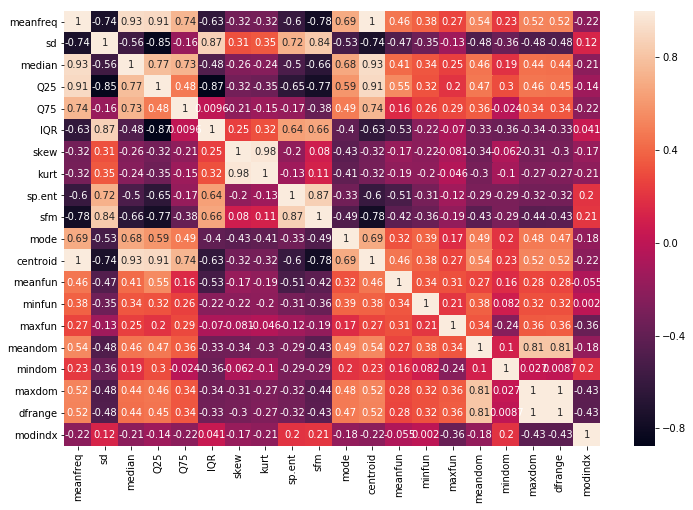

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(),annot= True)

__Need to delete high correlated value.__ 

In [29]:
X = X.drop(['meanfreq','sd','Q25','meandom','kurt','sfm'],axis=1)

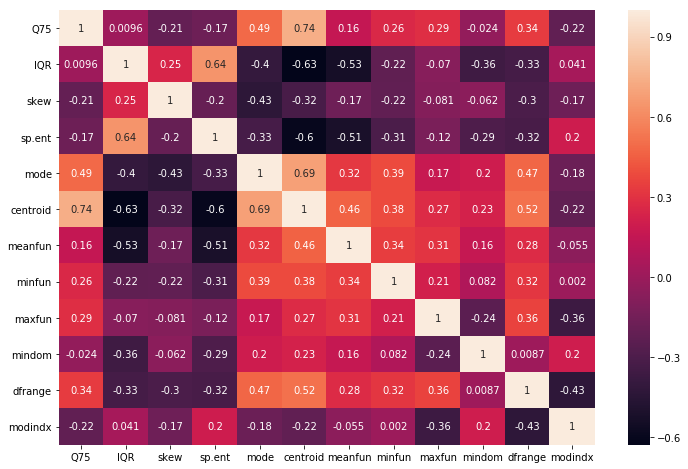

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(),annot= True)

In [31]:
X = X.drop('maxdom',axis=1)

In [33]:
X = X.drop('median',axis=1)

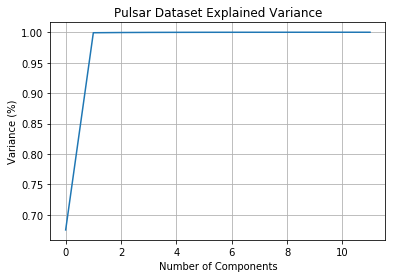

In [35]:
pca = PCA().fit(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.grid(True)
plt.show()

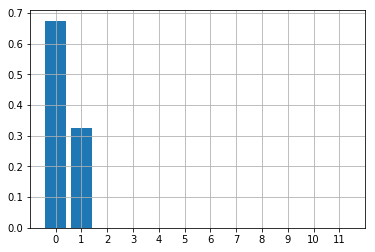

In [36]:
#Scree plot 
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.xticks(range(pca.n_components_))
plt.grid(True)

In [44]:
pca = PCA(n_components=2)
PC = pca.fit_transform(X)
PC = StandardScaler().fit_transform(PC)

In [45]:
pcdf = pd.DataFrame(data = PC
             , columns = ['principal component 1', 'principal component 2'])
pcdf['label'] = y 
pcdf.head()

,principal component 1,principal component 2,label
0,2.411907,0.123948,1
1,4.248724,1.623055,1
2,5.858613,2.908131,1
3,0.111093,-1.531763,1
4,-0.444556,-0.183598,1


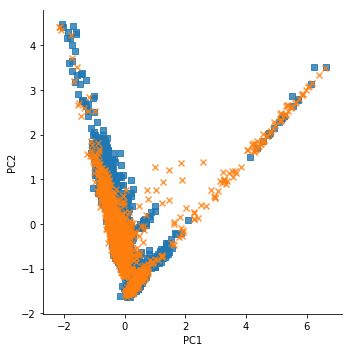

In [48]:
pcdf.columns=["PC1","PC2","label"]
markers = ['s', 'x']
colors = ['r', 'b']
sns.lmplot(x="PC1", y="PC2", data=pcdf, hue='label', markers=markers,fit_reg=False,legend=False)
plt.show()

In [50]:
X_train,X_test,y_train,y_test = train_test_split(PC,y,test_size=.3,random_state=3)

In [51]:
# Fit the SVM model
sv = svm.SVC()
msv = sv.fit(X_train,y_train)
y_pred = msv.predict(X_test)
print(msv.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.668769716088328
             precision    recall  f1-score   support

          0       0.76      0.54      0.63       500
          1       0.61      0.81      0.70       451

avg / total       0.69      0.67      0.66       951



In [52]:
lg = LogisticRegression()
msv = lg.fit(X_train,y_train)
y_pred = msv.predict(X_test)
print(msv.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.5951629863301787
             precision    recall  f1-score   support

          0       0.63      0.55      0.59       500
          1       0.56      0.64      0.60       451

avg / total       0.60      0.60      0.59       951



__Without PCA __

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=3)

In [54]:
# Fit the SVM model
sv = svm.SVC()
msv = sv.fit(X_train,y_train)
y_pred = msv.predict(X_test)
print(msv.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.7276550998948476
             precision    recall  f1-score   support

          0       0.80      0.65      0.71       500
          1       0.68      0.82      0.74       451

avg / total       0.74      0.73      0.73       951



In [55]:
lg = LogisticRegression()
msv = lg.fit(X_train,y_train)
y_pred = msv.predict(X_test)
print(msv.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.8843322818086226
             precision    recall  f1-score   support

          0       0.96      0.81      0.88       500
          1       0.82      0.96      0.89       451

avg / total       0.90      0.88      0.88       951



__Logstistic Regression will provide better prediction__